Clean the "movie_metadata.csv" dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Colab資料夾設定方法
#!pip install google.colab #如未安裝取消註解後執行
import os

from google.colab import drive
drive.mount('/content/drive')

##出現提示欄進行授權

os.chdir('/content/drive/My Drive/newmovie/data2/') #切換該目錄
# os.listdir() #確認目錄內容

Mounted at /content/drive


In [3]:
credits = pd.read_csv('credits.csv')

In [4]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
meta = pd.read_csv('movies_metadata.csv', low_memory=False)

In [6]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [9]:
meta['year'] = meta['release_date'].dt.year

In [10]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

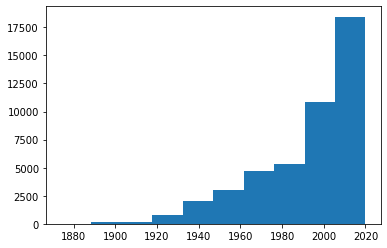

(45466, 25)

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mlp
plt.hist(meta.year)
plt.show()
meta.shape

In [12]:
new_meta = meta.loc[meta.year <= 2017,['id', 'title', 'year', 'genres', 'overview', 'popularity', 'vote_average', 'vote_count']]

In [13]:
new_meta.head()

,id,title,year,genres,overview,popularity,vote_average,vote_count
0,862,Toy Story,1995.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",21.946943,7.7,5415.0
1,8844,Jumanji,1995.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,17.015539,6.9,2413.0
2,15602,Grumpier Old Men,1995.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,11.7129,6.5,92.0
3,31357,Waiting to Exhale,1995.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",3.859495,6.1,34.0
4,11862,Father of the Bride Part II,1995.0,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,8.387519,5.7,173.0


In [14]:
new_meta['id'] = new_meta['id'].astype(int)

In [15]:
data = pd.merge(new_meta, credits, on='id')

In [16]:
data.head()

,id,title,year,genres,overview,popularity,vote_average,vote_count,cast,crew
0,862,Toy Story,1995.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...",21.946943,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,1995.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,17.015539,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,1995.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,11.7129,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,1995.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...",3.859495,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,1995.0,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,8.387519,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [17]:
import ast

In [18]:
pd.set_option('display.max_colwidth', 75)
data

,id,title,year,genres,overview,popularity,vote_average,vote_count,cast,crew
0,862,Toy Story,1995.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': ...","Led by Woody, Andy's toys live happily in his room until Andy's birthda...",21.946943,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', '..."
1,8844,Jumanji,1995.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id':...",When siblings Judy and Peter discover an enchanted board game that open...,17.015539,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a3...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', ..."
2,15602,Grumpier Old Men,1995.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",A family wedding reignites the ancient feud between next-door neighbors...,11.7129,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a92514...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', '..."
3,31357,Waiting to Exhale,1995.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 1074...","Cheated on, mistreated and stepped on, the women are holding their brea...",3.859495,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': ...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', '..."
4,11862,Father of the Bride Part II,1995.0,"[{'id': 35, 'name': 'Comedy'}]","Just when George Banks has recovered from his daughter's wedding, he re...",8.387519,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gend..."
...,...,...,...,...,...,...,...,...,...,...
45440,30840,Robin Hood,1991.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id': 1074...","Yet another version of the classic epic, with enough variation to make ...",5.683753,5.7,26.0,"[{'cast_id': 1, 'character': 'Sir Robert Hode', 'credit_id': '52fe44439...","[{'credit_id': '52fe44439251416c9100a899', 'department': 'Directing', '..."
45441,111109,Century of Birthing,2011.0,"[{'id': 18, 'name': 'Drama'}]",An artist struggles to finish his work while a storyline about a cult p...,0.178241,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela', 'credit_id': '52fe4af1...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'department': 'Directing', '..."
45442,67758,Betrayal,2003.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 53, ...","When one of her hits goes wrong, a professional assassin ends up with a...",0.903007,3.8,6.0,"[{'cast_id': 6, 'character': 'Emily Shaw', 'credit_id': '52fe4776c3a368...","[{'credit_id': '52fe4776c3a368484e0c8387', 'department': 'Directing', '..."
45443,227506,Satan Triumphant,1917.0,[],"In a small town live two brothers, one a minister and the other one a h...",0.003503,0.0,0.0,"[{'cast_id': 2, 'character': '', 'credit_id': '52fe4ea59251416c7515d7d5...","[{'credit_id': '533bccebc3a36844cf0011a7', 'department': 'Directing', '..."


In [19]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [20]:
# evaluates an expression node or a string containing a Python literal or container display
# ast.literal_eval(x) 把list轉換成原始資料型態
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [21]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [22]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [23]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [24]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [25]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [26]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [27]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [28]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [29]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [30]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [31]:
data.isna().sum()

id                  0
title               0
year                0
genres              0
overview          941
popularity          0
vote_average        0
vote_count          0
cast                0
crew                0
genres_list      2384
actor_1_name        0
actor_2_name        0
actor_3_name        0
director_name       0
dtype: int64

In [32]:
data = data.dropna(how='any')

In [33]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [34]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [35]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [36]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [37]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [38]:
old = pd.read_csv('../newdatas/movie_metadata_need.csv')

In [39]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [40]:
old.shape,movie.shape

((5043, 7), (42367, 7))

In [41]:
new = old.append(movie)

In [42]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [43]:
new.shape

(39704, 7)

In [44]:
new.to_csv('new_meta.csv',index=False)

In [45]:
new.to_csv('../newdatas/merge.csv',index=False)

In [46]:
data.to_csv('../newdatas/meta_cleaned.csv',index=False)

In [47]:
new[new.genres=="Animation Comedy Family Musical"]

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,comb
175,happy feet 2,George Miller,Robin Williams,Brad Pitt,Common,Animation Comedy Family Musical,Robin Williams Brad Pitt Common George Miller Animation Comedy Family M...
